In [1]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [2]:
import pandas as pd
import numpy as np
train='KDDTrain+.txt'
test='KDDTest+.txt'
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
train_data['label'].value_counts()

,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [5]:
train_data['is_under_attack'] = np.where(train_data.label == 'normal', 0, 1)
test_data['is_under_attack'] = np.where(test_data.label == 'normal', 0, 1)

train_data_nolabels = train_data.drop(labels=['is_under_attack', 'label'], axis=1)
test_data_nolabels = test_data.drop(labels=['is_under_attack', 'label'], axis=1)


In [6]:
numeric_features = train_data_nolabels.select_dtypes(include='number').columns

In [7]:

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['protocol_type','service','flag']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [8]:
X_train = preprocessor.fit_transform(train_data_nolabels)
y_train = train_data['is_under_attack']

X_test = preprocessor.transform(test_data_nolabels)
y_test = test_data['is_under_attack']
# test_data_processed = preprocessor.fit_transform(train_data)

In [9]:
!pip install keras-core

In [10]:
! pip install tf-keras


In [11]:
import tensorflow as tf
# from tensorflow.keras.utils import to_categorical

# from keras.layers import Dense # importing dense layer
# from keras.models import Sequential #importing Sequential layer
# from keras.layers import Input
# from keras.models import Model
# # representation of model layers
# from tensorflow import keras

import tf_keras as keras
from tf_keras.layers import Dense # importing dense layer
from tf_keras.models import Sequential #importing Sequential layer
from tf_keras.layers import Input
from tf_keras.models import Model


In [12]:
keras.utils.set_random_seed(812)

tf.config.experimental.enable_op_determinism()


In [13]:
# mlp = Sequential() # initializing model
# # input layer and first layer with 50 neurons
# mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# mlp.add(Dense(units=25, activation='relu'))
# # output layer with sigmoide activation
# mlp.add(Dense(1,activation='sigmoid'))

mlp = Sequential([
    Dense(32, activation='relu', input_shape=(123,)),# Hidden layer with ReLU activation
    Dense(16, activation='relu'),                    # Another hidden layer
    Dense(1)                                         # Output layer without activation for logits
])

mlp.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [14]:
history = mlp.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2)


Epoch 1/50
99/99 [==============================] - 4s 13ms/step - loss: 0.2924 - accuracy: 0.9479 - val_loss: 0.0942 - val_accuracy: 0.9757
Epoch 2/50
99/99 [==============================] - 1s 8ms/step - loss: 0.0619 - accuracy: 0.9816 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 3/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0249 - val_accuracy: 0.9919
Epoch 4/50
99/99 [==============================] - 1s 8ms/step - loss: 0.0222 - accuracy: 0.9918 - val_loss: 0.0179 - val_accuracy: 0.9930
Epoch 5/50
99/99 [==============================] - 1s 9ms/step - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0139 - val_accuracy: 0.9944
Epoch 6/50
99/99 [==============================] - 1s 9ms/step - loss: 0.0136 - accuracy: 0.9947 - val_loss: 0.0118 - val_accuracy: 0.9956
Epoch 7/50
99/99 [==============================] - 1s 10ms/step - loss: 0.0115 - accuracy: 0.9955 - val_loss: 0.0105 - val_accuracy: 0.9958
Epoch 8/50
99/99 [

In [15]:
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

705/705 [==============================] - 2s 2ms/step - loss: 1.4146 - accuracy: 0.8243
Test results - Loss: 1.4145630598068237 - Accuracy: 82.42548108100891%


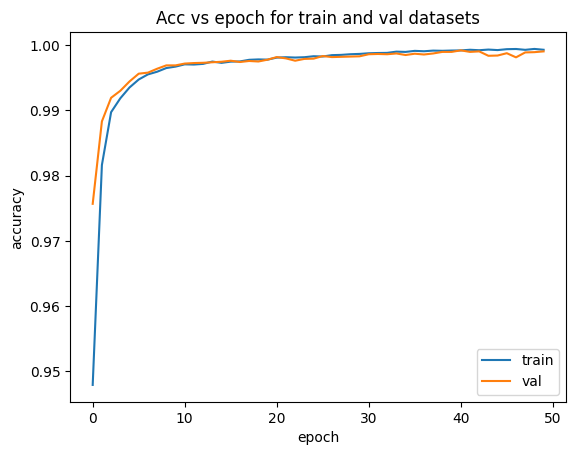

In [16]:
import matplotlib.pyplot as plt
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc vs epoch for train and val datasets")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

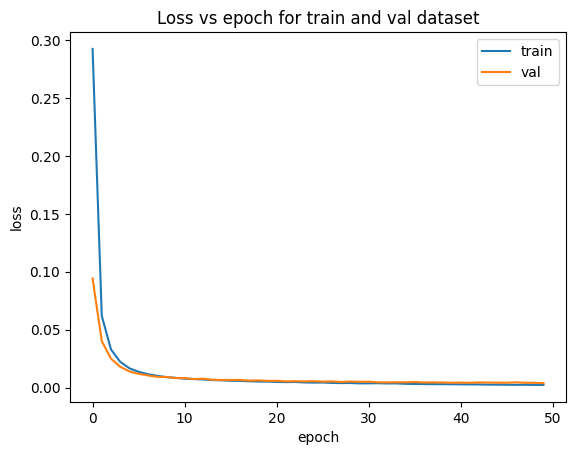

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs epoch for train and val dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class labels
y_pred = (mlp.predict(X_test)> 0).astype(bool)

# Calculate precision, recall, and F1 score
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


705/705 [==============================] - 1s 2ms/step
Accuracy: 0.829888218594748
Precision: 0.9282314867694651
Recall: 0.7599158419699213
F1 Score: 0.835682762757616


In [19]:
!pip install tensorflow_model_optimization

In [20]:
import tensorflow_model_optimization as tfmot

In [21]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

batch_size = 128
epochs = 2
validation_split = 0.1

num_images = X_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.30,
                                                               final_sparsity=0.55,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(mlp, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense   (None, 32)                7906      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_dense_  (None, 16)                1042      
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_  (None, 1)                 35        
 2 (PruneLowMagnitude)                                           
                                                                 
Total params: 8983 (35.10 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 4470 (17.47 KB)
_________________________________________________________________


In [22]:
import tempfile
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)


Epoch 1/2
  6/886 [..............................] - ETA: 9s - loss: nan - accuracy: 1.0000     

886/886 [==============================] - 28s 21ms/step - loss: nan - accuracy: 0.9963 - val_loss: nan - val_accuracy: 0.9955
Epoch 2/2
886/886 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.9938 - val_loss: nan - val_accuracy: 0.9937


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class labels
y_pred = (model_for_pruning.predict(X_test)> 0).astype(bool)

# Calculate precision, recall, and F1 score
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


705/705 [==============================] - 1s 2ms/step
Accuracy: 0.8272711142654364
Precision: 0.9241719654550631
Recall: 0.7588249045429751
F1 Score: 0.8333761232349166


## Saving

In [24]:
# for layer in mlp.layers:
#   for w in layer.weights:
#     mlp.layers[0].weights

In [36]:
ws = model_for_pruning.get_weights()

In [37]:
for w in ws:
  print(w.shape)

(123, 32)
(32,)
(123, 32)
()
()
(32, 16)
(16,)
(32, 16)
()
()
(16, 1)
(1,)
(16, 1)
()
()


In [38]:
ws[2]

array([[1., 0., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [39]:
import struct
def save_vector(vector, filename):
    with open(filename, 'wb') as f:
        for number in vector:
             f.write(struct.pack('f', number))


In [51]:
names = ['weights_0', 'bias_0', 'weights_1', 'bias_1', 'weights_2', 'bias_2']
weights = [0, 1, 5, 6, 10, 11]
for i, w_ix in enumerate(weights):
  # print(ws[w_ix].shape, ws[w_ix].flatten())
  save_vector(ws[w_ix].T.flatten(), f'{names[i]}.bin')

In [30]:
model_for_pruning.predict(X_test[0:1])

1/1 [==============================] - 0s 28ms/step


array([[29.246601]], dtype=float32)

In [50]:
model_for_pruning(X_test)

<tf.Tensor: shape=(22544, 1), dtype=float32, numpy=
array([[ 29.246601 ],
       [ 28.367958 ],
       [-11.74519  ],
       ...,
       [  2.3416467],
       [-15.610713 ],
       [ 11.392637 ]], dtype=float32)>

In [32]:
model_for_pruning(X_test[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 29.246601 ],
       [ 28.367956 ],
       [-11.74519  ],
       [  6.337084 ],
       [ -4.354602 ],
       [-13.834963 ],
       [-15.322468 ],
       [  4.670806 ],
       [-13.157763 ],
       [  6.4349313]], dtype=float32)>

In [41]:
X_test_output = model_for_pruning(X_test)
np.save('X_test_output', X_test_output)

In [33]:
(mlp(X_test[:10]) > 0)._numpy().astype(int).flatten() == y_test[:10]

,is_under_attack
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True
9,True


In [34]:
y_test[:10]

,is_under_attack
0,1
1,1
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [52]:
from google.colab import files
for file in names:
  files.download(f'{file}.bin')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>